### All References -
I still don't fully understand what the tensorflow functions are doing behind the scenes to generate the data that it does, so I used a lot of examples/references in an effort to learn as much as possible. I have listed all of these references below:


1.   Dynamic json dataset file uploads: https://towardsdatascience.com/importing-data-to-google-colab-the-clean-way-5ceef9e9e3c8
2.   Natural language processing youtube tutorial with TensorFlow/Keras: https://youtu.be/Y_hzMnRXjhI
3.   Kaggles sarcasm LSTM reference: https://www.kaggle.com/yosrbali/sarcasm
4.   Kaggle sarcasm Feed-Forward reference: https://www.kaggle.com/aaakk5/sarcasm-feedforward-nn-and-exploratory-analysis
5.   Kaggle sarcasm notebook (specifically the model testing cell at the end) reference: https://www.kaggle.com/abhinavschwarz/sarcasm-detection-86-accuracy
5.   Short 10 min tensorflow neural network youtube video: https://www.youtube.com/watch?v=NxNrIwejnPI  
6.   SureStart curriculum DeepLearning/NeuralNetwork article: https://serokell.io/blog/deep-learning-and-neural-network-guide
7.   SureStart curriculum Keras article: https://www.datacamp.com/community/tutorials/deep-learning-python
8.   SureStart curriculum TensorFlow article: https://www.datacamp.com/community/tutorials/tensorflow-tutorial



### Import Libraries -

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

print("Libraries imported!")

Libraries imported!


### Test the environment for all the required items -


In [ ]:
# Make sure the dataset exists.
import os
dataExists = os.path.exists('/content/Sarcasm_Headlines_Dataset_v2.json')
if dataExists:
  print(f"Dataset Exists: {dataExists}")
else:
  print(f"Dataset does not exist! Try importing it:")
  from google.colab import files
  uploaded = files.upload()


# Check for GPU
import tensorflow as tf
deviceName = tf.test.gpu_device_name()
if deviceName != "/device:GPU:0":
  print(f"GPU not found!")
print(f"Found GPU: {device_name}")

Dataset Exists: True
Found GPU: /device:GPU:0


### Read Data -

In [ ]:

pd_dataframe = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)
pd_dataframe.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


### Split the data into training data and testing data (90:10 split) -
I chose an arbritrary split of 90:10, but I'm not sure how much that ratio matters.

In [ ]:
trainX, testX, trainY, testY = train_test_split(pd_dataframe['is_sarcastic'], pd_dataframe['headline'], test_size=0.1)
trainX = trainX.to_numpy()
testX = testX.to_numpy()
trainY = trainY.to_numpy()
testY = testY.to_numpy()

# print(testX)
print(len(trainX), len(testX))
print(len(trainY), len(testY))

25757 2862
25757 2862


### Tokenize the training data strings and sequence them -

In [56]:
model_tokenizer = Tokenizer()
model_tokenizer.fit_on_texts(trainY)

trainingSequences = model_tokenizer.texts_to_sequences(trainY)
trainingPadded = pad_sequences(trainingSequences, 100)

testingSequences = model_tokenizer.texts_to_sequences(testY)
testingPadded = pad_sequences(testingSequences, 100)

# print(trainingSequences)
# print(trainY)
# print(testingSequences)
# print(trainX)

### Create the model and layers, then compile and fit -


In [ ]:
model = Sequential()

model.add(Embedding(100000, 12, input_length=100))
model.add(LSTM(128))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
trainingHistory = model.fit(trainingPadded, trainX, epochs=25, validation_data=(testingPadded, testX), batch_size=256)


Epoch 1/25
101/101 [==============================] - 4s 29ms/step - loss: 0.6554 - accuracy: 0.5913 - val_loss: 0.3663 - val_accuracy: 0.8375
Epoch 2/25
101/101 [==============================] - 2s 23ms/step - loss: 0.2778 - accuracy: 0.8890 - val_loss: 0.3146 - val_accuracy: 0.8655
Epoch 3/25
101/101 [==============================] - 2s 24ms/step - loss: 0.1539 - accuracy: 0.9481 - val_loss: 0.3548 - val_accuracy: 0.8613
Epoch 4/25
101/101 [==============================] - 2s 24ms/step - loss: 0.0859 - accuracy: 0.9742 - val_loss: 0.4067 - val_accuracy: 0.8532
Epoch 5/25
101/101 [==============================] - 2s 24ms/step - loss: 0.0482 - accuracy: 0.9873 - val_loss: 0.5088 - val_accuracy: 0.8515
Epoch 6/25
101/101 [==============================] - 2s 24ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.6547 - val_accuracy: 0.8431
Epoch 7/25
101/101 [==============================] - 2s 24ms/step - loss: 0.0201 - accuracy: 0.9948 - val_loss: 0.7406 - val_accuracy: 0.8407

### Visualize the training history -

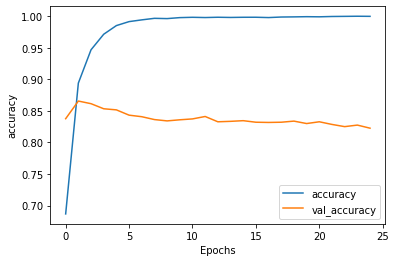

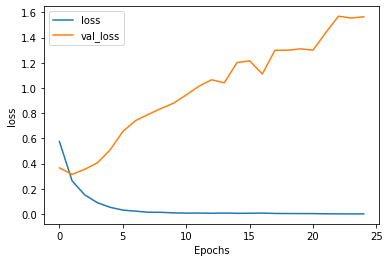

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(trainingHistory.history[string])
  plt.plot(trainingHistory.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(trainingHistory, "accuracy")
plot_graphs(trainingHistory, "loss")

### Testing -

In [79]:
# I didn't know what to write for example sentences :P
testSentences = ["Man finds himself falling off a cliff after working a late shift at an Amazon warehouse", "Elon Musk is now the richest man in the world!"]
testSequences = model_tokenizer.texts_to_sequences(testSentences)
testPadded = pad_sequences(testSequences, maxlen=2, padding='post')
print(model.predict(testPadded))

# modelEvaluation = model.evaluate(testingPadded, testX)
# print(f'Validation_loss: {modelEvaluation[0]}')
# print(f'Accuracy: {modelEvaluation[1]}')


[[0.98822325]
 [0.00278841]]
